In [2]:

import pandas as pd 
import polars as pl
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import json
from typing import List, Tuple

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
def split_data(df: pd.DataFrame) -> pd.DataFrame:
    features = df[["processId", "parentProcessId", "userId", "mountNamespace", "eventId", "argsNum", "returnValue",'System_Core','Amazon_AWS','Container_Virtualization','Maintenance_Package_Management','Security_Monitoring','Utility_Misc']]
    labels = df['sus']
    return features, labels

In [4]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
train = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val_OHE/full_train_df_feats_OHE.csv')
train_df_feats, train_df_labels =split_data(train)

test = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val_OHE/full_test_df_feats_OHE.csv')
test_df_feats, test_df_labels =split_data(test)

val = pd.read_csv(relative_path+'/preprocessed_data/full_dataset_train_test_val_OHE/full_val_df_feats_OHE.csv')
val_df_feats, val_df_labels =split_data(val)

print(train_df_feats.shape)
print(train_df_labels.shape)
print(test_df_feats.shape)
print(test_df_labels.shape)
print(val_df_feats.shape)
print(val_df_labels.shape)

a:\Desktop\FYP Final Files\Feature Importance
(763144, 13)
(763144,)
(188967, 13)
(188967,)
(188967, 13)
(188967,)


# Random Forest - Feature Importance

In [5]:
# Init the random forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)


In [6]:
# Split the data into features and target label
X = train_df_feats
y = train_df_labels

X_train = train_df_feats
y_train = train_df_labels
X_test = test_df_feats
y_test = test_df_labels
X_val = val_df_feats
y_val = val_df_labels

In [7]:
# fit model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Test dataset - Includes an attack

In [8]:
# test predictions
y_pred = random_forest_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9406457212105818
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     17508
           1       1.00      0.93      0.97    171459

    accuracy                           0.94    188967
   macro avg       0.80      0.97      0.86    188967
weighted avg       0.96      0.94      0.95    188967



## Validation dataset - no attack

In [9]:

# test predications
y_pred = random_forest_model.predict(X_val)

# Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.9997936147581323
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    188181
           1       1.00      0.95      0.97       786

    accuracy                           1.00    188967
   macro avg       1.00      0.98      0.99    188967
weighted avg       1.00      1.00      1.00    188967



# Feature Importance

Feature Importances:
userId: 0.7875086712299149
parentProcessId: 0.06554213159960397
eventId: 0.05262312456523222
Maintenance_Package_Management: 0.03825337814136825
returnValue: 0.01348821197225673
mountNamespace: 0.011292190533149418
argsNum: 0.00870403174055885
System_Core: 0.005180240472552123
Security_Monitoring: 0.00482315377574816
processId: 0.004623047511559431
Utility_Misc: 0.004075780764394016
Amazon_AWS: 0.0037615944104877346
Container_Virtualization: 0.00012444328317442064


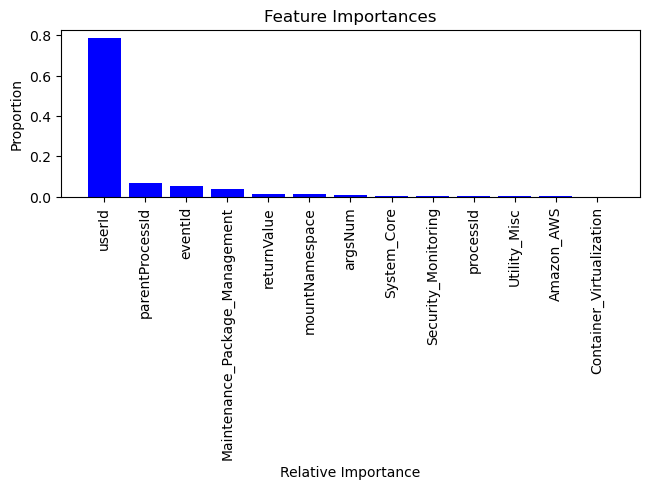

In [10]:
# Feature importance
feature_importances = random_forest_model.feature_importances_

# Sort the importance and display in order
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

# For visualisation
plt.title('Feature Importances')
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], color='b', align='center')
plt.xticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices], rotation=90)
plt.tight_layout()
plt.xlabel('Relative Importance')
plt.ylabel('Proportion')
plt.show()

In [11]:
feature_importances

array([4.62304751e-03, 6.55421316e-02, 7.87508671e-01, 1.12921905e-02,
       5.26231246e-02, 8.70403174e-03, 1.34882120e-02, 5.18024047e-03,
       3.76159441e-03, 1.24443283e-04, 3.82533781e-02, 4.82315378e-03,
       4.07578076e-03])